In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()
import sklearn.metrics as metrics
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_excel(r'C:/Users/Zianna/OneDrive/Desktop/PROJECTS- DSBA/FRA/Milestone 1/Company_Data2015-1.xlsx')

In [3]:
df.head()

,Co_Code,Co_Name,Networth Next Year,Equity Paid Up,Networth,Capital Employed,Total Debt,Gross Block,Net Working Capital,Current Assets,...,PBIDTM (%)[Latest],PBITM (%)[Latest],PBDTM (%)[Latest],CPM (%)[Latest],APATM (%)[Latest],Debtors Velocity (Days),Creditors Velocity (Days),Inventory Velocity (Days),Value of Output/Total Assets,Value of Output/Gross Block
0,16974,Hind.Cables,-8021.60,419.36,-7027.48,-1007.24,5936.03,474.30,-1076.34,40.50,...,0.00,0.00,0.00,0.00,0.00,0,0,45.0,0.00,0.00
1,21214,Tata Tele. Mah.,-3986.19,1954.93,-2968.08,4458.20,7410.18,9070.86,-1098.88,486.86,...,-10.30,-39.74,-57.74,-57.74,-87.18,29,101,2.0,0.31,0.24
2,14852,ABG Shipyard,-3192.58,53.84,506.86,7714.68,6944.54,1281.54,4496.25,9097.64,...,-5279.14,-5516.98,-7780.25,-7723.67,-7961.51,97,558,0.0,-0.03,-0.26
3,2439,GTL,-3054.51,157.30,-623.49,2353.88,2326.05,1033.69,-2612.42,1034.12,...,-3.33,-7.21,-48.13,-47.70,-51.58,93,63,2.0,0.24,1.90
4,23505,Bharati Defence,-2967.36,50.30,-1070.83,4675.33,5740.90,1084.20,1836.23,4685.81,...,-295.55,-400.55,-845.88,379.79,274.79,3887,346,0.0,0.01,0.05


In [4]:
df.shape

(3586, 67)

In [5]:
print('The number of rows in this dataset is ',df.shape[0],'\n',
'The number of columns in this dataset is ',df.shape[1])

The number of rows in this dataset is  3586 
 The number of columns in this dataset is  67


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3586 entries, 0 to 3585
Data columns (total 67 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Co_Code                              3586 non-null   int64  
 1   Co_Name                              3586 non-null   object 
 2   Networth Next Year                   3586 non-null   float64
 3   Equity Paid Up                       3586 non-null   float64
 4   Networth                             3586 non-null   float64
 5   Capital Employed                     3586 non-null   float64
 6   Total Debt                           3586 non-null   float64
 7   Gross Block                          3586 non-null   float64
 8   Net Working Capital                  3586 non-null   float64
 9   Current Assets                       3586 non-null   float64
 10  Current Liabilities and Provisions   3586 non-null   float64
 11  Total Assets/Liabilities      

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Co_Code,3586.0,16065.388734,19776.817379,4.00,3029.2500,6077.500,24269.5000,72493.00
Networth Next Year,3586.0,725.045251,4769.681004,-8021.60,3.9850,19.015,123.8025,111729.10
Equity Paid Up,3586.0,62.966584,778.761744,0.00,3.7500,8.290,19.5175,42263.46
Networth,3586.0,649.746299,4091.988792,-7027.48,3.8925,18.580,117.2975,81657.35
Capital Employed,3586.0,2799.611054,26975.135385,-1824.75,7.6025,39.090,226.6050,714001.25
...,...,...,...,...,...,...,...,...
Debtors Velocity (Days),3586.0,603.894032,10636.759580,0.00,8.0000,49.000,106.0000,514721.00
Creditors Velocity (Days),3586.0,2057.854992,54169.479197,0.00,8.0000,39.000,89.0000,2034145.00
Inventory Velocity (Days),3483.0,79.644559,137.847792,-199.00,0.0000,35.000,96.0000,996.00
Value of Output/Total Assets,3586.0,0.819757,1.201400,-0.33,0.0700,0.480,1.1600,17.63


In [8]:
pd.options.display.float_format = '{:.2f}'.format
df.describe()

,Co_Code,Networth Next Year,Equity Paid Up,Networth,Capital Employed,Total Debt,Gross Block,Net Working Capital,Current Assets,Current Liabilities and Provisions,...,PBIDTM (%)[Latest],PBITM (%)[Latest],PBDTM (%)[Latest],CPM (%)[Latest],APATM (%)[Latest],Debtors Velocity (Days),Creditors Velocity (Days),Inventory Velocity (Days),Value of Output/Total Assets,Value of Output/Gross Block
count,3586.00,3586.00,3586.00,3586.00,3586.00,3586.00,3586.00,3586.00,3586.00,3586.00,...,3585.00,3585.00,3585.00,3585.00,3585.00,3586.00,3586.00,3483.00,3586.00,3586.00
mean,16065.39,725.05,62.97,649.75,2799.61,1994.82,594.18,410.81,1960.35,391.99,...,-51.16,-109.21,-311.57,-307.01,-365.06,603.89,2057.85,79.64,0.82,61.88
std,19776.82,4769.68,778.76,4091.99,26975.14,23652.84,4871.55,6301.22,22577.57,2675.00,...,1795.13,3057.64,10921.59,10676.15,12500.05,10636.76,54169.48,137.85,1.20,976.82
min,4.00,-8021.60,0.00,-7027.48,-1824.75,-0.72,-41.19,-13162.42,-0.91,-0.23,...,-78870.45,-141600.00,-590500.00,-572000.00,-688600.00,0.00,0.00,-199.00,-0.33,-61.00
25%,3029.25,3.98,3.75,3.89,7.60,0.03,0.57,0.94,4.00,0.73,...,0.00,0.00,0.00,0.00,0.00,8.00,8.00,0.00,0.07,0.27
50%,6077.50,19.02,8.29,18.58,39.09,7.49,15.87,10.14,24.54,9.23,...,8.07,5.23,4.69,3.89,1.59,49.00,39.00,35.00,0.48,1.53
75%,24269.50,123.80,19.52,117.30,226.60,72.35,131.90,61.17,135.28,65.65,...,18.99,14.29,14.11,11.39,7.41,106.00,89.00,96.00,1.16,4.91
max,72493.00,111729.10,42263.46,81657.35,714001.25,652823.81,128477.59,223257.56,721166.00,83232.98,...,19233.33,19195.70,15640.00,15640.00,15266.67,514721.00,2034145.00,996.00,17.63,43404.00


#### RENAMING THE COLUMNS AS PER NEW NAME

In [9]:
df_dict = pd.read_excel(r"C:\Users\Zianna\OneDrive\Desktop\PROJECTS- DSBA\FRA\Milestone 1\Data_Dictionary .xlsx")
df_dict

,#,Field Name,Description,New Field Name
0,1,Co_Code,Company Code,Co_Code
1,2,Co_Name,Company Name,Co_Name
2,3,Networth Next Year,Value of a company as on 2016 - Next Year(diff...,Networth_Next_Year
3,4,Equity Paid Up,Amount that has been received by the company t...,Equity_Paid_Up
4,5,Networth,Value of a company as on 2015 - Current Year,Networth
...,...,...,...,...
63,64,Debtors Velocity (Days),Average days required for receiving the payments,Debtors_Vel_Days
64,65,Creditors Velocity (Days),Average number of days company takes to pay su...,Creditors_Vel_Days
65,66,Inventory Velocity (Days),Average number of days the company needs to tu...,Inventory_Vel_Days
66,67,Value of Output/Total Assets,Ratio of Value of Output (market value) to Tot...,Value_of_Output_to_Total_Assets


In [10]:
df.columns = df.columns.str.replace(' ','_').str.replace('(','').str.replace(')','').str.replace('/','_by_').str.replace('%','perc').str.replace('.','').str.replace('-','_')

#### THE COLUMNS HAVE SUCCESSFULLY BEEN RENAMED

#### PRESENCE OF OUTLIERS IN THE DATASET

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
        35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
        52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66]),
 [Text(1, 0, 'Co_Code'),
  Text(2, 0, 'Networth_Next_Year'),
  Text(3, 0, 'Equity_Paid_Up'),
  Text(4, 0, 'Networth'),
  Text(5, 0, 'Capital_Employed'),
  Text(6, 0, 'Total_Debt'),
  Text(7, 0, 'Gross_Block_'),
  Text(8, 0, 'Net_Working_Capital_'),
  Text(9, 0, 'Current_Assets_'),
  Text(10, 0, 'Current_Liabilities_and_Provisions_'),
  Text(11, 0, 'Total_Assets_by_Liabilities_'),
  Text(12, 0, 'Gross_Sales'),
  Text(13, 0, 'Net_Sales'),
  Text(14, 0, 'Other_Income'),
  Text(15, 0, 'Value_Of_Output'),
  Text(16, 0, 'Cost_of_Production'),
  Text(17, 0, 'Selling_Cost'),
  Text(18, 0, 'PBIDT'),
  Text(19, 0, 'PBDT'),
  Text(20, 0, 'PBIT'),
  Text(21, 0, 'PBT'),
  Text(22, 0, 'PAT'),
  Text(23, 0, 

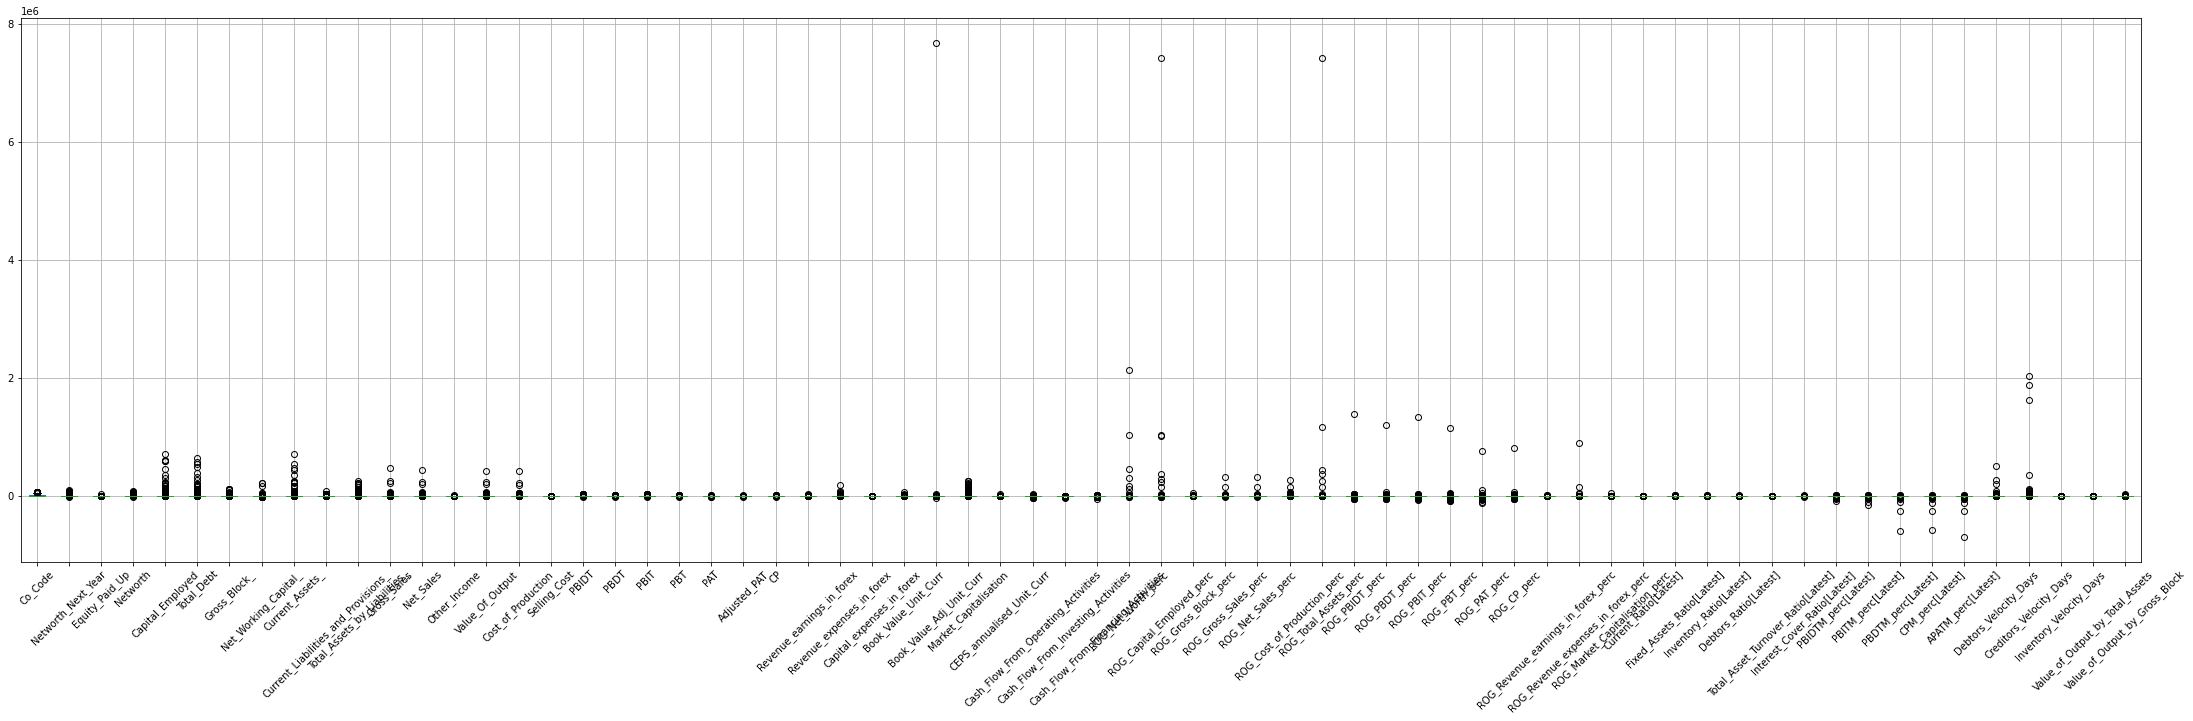

In [11]:
plt.figure(figsize=(38,10))
df.boxplot()
plt.xticks(rotation=45)

 We can see that there are outliers present in most of the variables.
 Before outlier treatment we can first drop columns that we do not deem essential for the data.

In [12]:
df = df.drop(['Co_Code', 'Co_Name'], axis = 1)


In [13]:
df.head()

,Networth_Next_Year,Equity_Paid_Up,Networth,Capital_Employed,Total_Debt,Gross_Block_,Net_Working_Capital_,Current_Assets_,Current_Liabilities_and_Provisions_,Total_Assets_by_Liabilities_,...,PBIDTM_perc[Latest],PBITM_perc[Latest],PBDTM_perc[Latest],CPM_perc[Latest],APATM_perc[Latest],Debtors_Velocity_Days,Creditors_Velocity_Days,Inventory_Velocity_Days,Value_of_Output_by_Total_Assets,Value_of_Output_by_Gross_Block
0,-8021.60,419.36,-7027.48,-1007.24,5936.03,474.30,-1076.34,40.50,1116.85,109.60,...,0.00,0.00,0.00,0.00,0.00,0,0,45.00,0.00,0.00
1,-3986.19,1954.93,-2968.08,4458.20,7410.18,9070.86,-1098.88,486.86,1585.74,6043.94,...,-10.30,-39.74,-57.74,-57.74,-87.18,29,101,2.00,0.31,0.24
2,-3192.58,53.84,506.86,7714.68,6944.54,1281.54,4496.25,9097.64,4601.39,12316.07,...,-5279.14,-5516.98,-7780.25,-7723.67,-7961.51,97,558,0.00,-0.03,-0.26
3,-3054.51,157.30,-623.49,2353.88,2326.05,1033.69,-2612.42,1034.12,3646.54,6000.42,...,-3.33,-7.21,-48.13,-47.70,-51.58,93,63,2.00,0.24,1.90
4,-2967.36,50.30,-1070.83,4675.33,5740.90,1084.20,1836.23,4685.81,2849.58,7524.91,...,-295.55,-400.55,-845.88,379.79,274.79,3887,346,0.00,0.01,0.05


### THERE ARE OUTLIERS PRESENT IN MOST OF THE VARIABLES. WE CAN GO AHEAD AND TREAT THE OUTLIERS. BUT Before Outlier treatment, let's get the default variable from the column "Networth_Next_Year" When net worth next year is negative then 1 When net worth next year is postive then 0.

### 1.3 TRANSFORMING TARGET VARIABLE TO 0 & 1

In [14]:
df['default'] = np.where((df['Networth_Next_Year'] > 0), 0, 1)

In [15]:
df[['default','Networth_Next_Year']].head(10)

,default,Networth_Next_Year
0,1,-8021.60
1,1,-3986.19
2,1,-3192.58
3,1,-3054.51
4,1,-2967.36
5,1,-2519.40
6,1,-2125.05
7,1,-2100.56
8,1,-1695.75
9,1,-1677.18


In [16]:
df['default'].value_counts()

0    3198
1     388
Name: default, dtype: int64

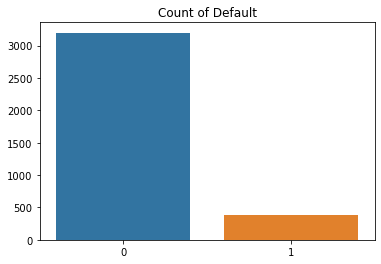

0   0.89
1   0.11
Name: default, dtype: float64


In [17]:
sns.barplot(df.default.value_counts().index,df.default.value_counts().values)
plt.title("Count of Default")
plt.show()
print(df.default.value_counts(normalize=True))

In [18]:
df.groupby(df['default']).sum()

,Networth_Next_Year,Equity_Paid_Up,Networth,Capital_Employed,Total_Debt,Gross_Block_,Net_Working_Capital_,Current_Assets_,Current_Liabilities_and_Provisions_,Total_Assets_by_Liabilities_,...,PBIDTM_perc[Latest],PBITM_perc[Latest],PBDTM_perc[Latest],CPM_perc[Latest],APATM_perc[Latest],Debtors_Velocity_Days,Creditors_Velocity_Days,Inventory_Velocity_Days,Value_of_Output_by_Total_Assets,Value_of_Output_by_Gross_Block
default,,,,,,,,,,,,,,,,,,,,,
0,2667204.13,214372.52,2373938.94,9967572.63,7046658.81,2059120.06,1462211.15,6968271.01,1355094.96,6255113.91,...,-124452.24,-193784.40,-452373.46,-463494.89,-532827.17,1983309,5105452,243673.00,2757.62,220144.65
1,-67191.86,11425.65,-43948.71,71832.61,106779.26,71605.22,10952.31,61541.12,50588.63,122421.24,...,-58966.72,-197745.69,-664606.27,-637120.30,-775899.26,182255,2274016,33729.00,182.03,1773.34


In [19]:
## DROPPING COLUMNS THAT ARE NOT USEFUL FOR US

In [20]:
df = df.drop(['Networth_Next_Year'], axis = 1)

In [21]:
print(df.isnull().sum())

Equity_Paid_Up                       0
Networth                             0
Capital_Employed                     0
Total_Debt                           0
Gross_Block_                         0
                                  ... 
Creditors_Velocity_Days              0
Inventory_Velocity_Days            103
Value_of_Output_by_Total_Assets      0
Value_of_Output_by_Gross_Block       0
default                              0
Length: 65, dtype: int64


In [22]:
## No. of defaults per column

In [23]:
## NULL VALUES IN THE DATASET

In [24]:
df.isnull().sum().sort_values(ascending=False)

Inventory_Velocity_Days                103
Book_Value_Adj_Unit_Curr                 4
Fixed_Assets_Ratio[Latest]               1
PBITM_perc[Latest]                       1
Current_Ratio[Latest]                    1
                                      ... 
Market_Capitalisation                    0
CEPS_annualised_Unit_Curr                0
Cash_Flow_From_Operating_Activities      0
Cash_Flow_From_Investing_Activities      0
default                                  0
Length: 65, dtype: int64

In [25]:
df.isnull().sum().sum()

118

There are 118 missing values in the dataset. We will now check the missing value by rows

In [26]:
df.isnull().sum(axis = 1).sort_values(ascending = False)

2825    11
393      1
277      1
598      1
3001     1
        ..
1213     0
1215     0
1216     0
1217     0
3585     0
Length: 3586, dtype: int64

In [27]:
df.size

233090

In [28]:
df_X = df.drop('default', axis = 1)
df_Y = df['default']

In [29]:
df_X.head()

,Equity_Paid_Up,Networth,Capital_Employed,Total_Debt,Gross_Block_,Net_Working_Capital_,Current_Assets_,Current_Liabilities_and_Provisions_,Total_Assets_by_Liabilities_,Gross_Sales,...,PBIDTM_perc[Latest],PBITM_perc[Latest],PBDTM_perc[Latest],CPM_perc[Latest],APATM_perc[Latest],Debtors_Velocity_Days,Creditors_Velocity_Days,Inventory_Velocity_Days,Value_of_Output_by_Total_Assets,Value_of_Output_by_Gross_Block
0,419.36,-7027.48,-1007.24,5936.03,474.30,-1076.34,40.50,1116.85,109.60,0.00,...,0.00,0.00,0.00,0.00,0.00,0,0,45.00,0.00,0.00
1,1954.93,-2968.08,4458.20,7410.18,9070.86,-1098.88,486.86,1585.74,6043.94,2892.73,...,-10.30,-39.74,-57.74,-57.74,-87.18,29,101,2.00,0.31,0.24
2,53.84,506.86,7714.68,6944.54,1281.54,4496.25,9097.64,4601.39,12316.07,392.13,...,-5279.14,-5516.98,-7780.25,-7723.67,-7961.51,97,558,0.00,-0.03,-0.26
3,157.30,-623.49,2353.88,2326.05,1033.69,-2612.42,1034.12,3646.54,6000.42,1354.39,...,-3.33,-7.21,-48.13,-47.70,-51.58,93,63,2.00,0.24,1.90
4,50.30,-1070.83,4675.33,5740.90,1084.20,1836.23,4685.81,2849.58,7524.91,38.72,...,-295.55,-400.55,-845.88,379.79,274.79,3887,346,0.00,0.01,0.05


<AxesSubplot:>

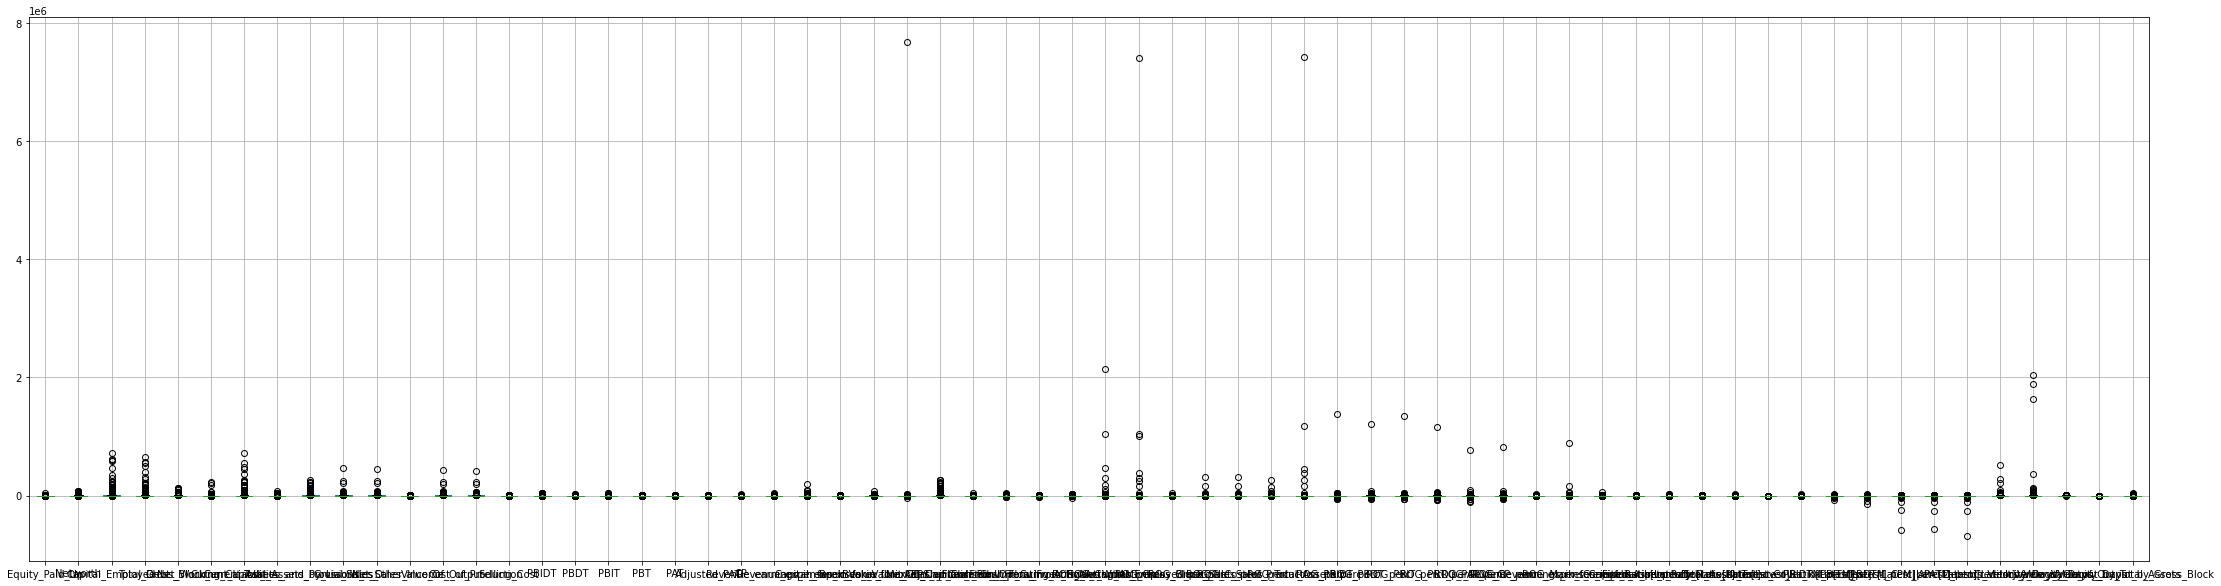

In [30]:
plt.figure(figsize=(38,10))
df_X.boxplot()

### 1.1 OUTLIER TREATMENT

In [31]:
Q1 = df_X.quantile(0.25)
Q3 = df_X.quantile(0.75)
IQR = Q3 - Q1
UL = Q3 + 1.5*IQR
LL = Q1 - 1.5*IQR

In [32]:
((df_X > UL) | (df_X < LL)).sum()

Equity_Paid_Up                     448
Networth                           650
Capital_Employed                   596
Total_Debt                         583
Gross_Block_                       540
                                  ... 
Debtors_Velocity_Days              398
Creditors_Velocity_Days            391
Inventory_Velocity_Days            262
Value_of_Output_by_Total_Assets    150
Value_of_Output_by_Gross_Block     481
Length: 64, dtype: int64

In [33]:
df_X[((df_X > UL) | (df_X < LL))]= np.nan

In [34]:
df_X.isnull().sum()

Equity_Paid_Up                     448
Networth                           650
Capital_Employed                   596
Total_Debt                         583
Gross_Block_                       540
                                  ... 
Debtors_Velocity_Days              398
Creditors_Velocity_Days            391
Inventory_Velocity_Days            365
Value_of_Output_by_Total_Assets    150
Value_of_Output_by_Gross_Block     481
Length: 64, dtype: int64

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
        35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
        52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64]),
 [Text(1, 0, 'Equity_Paid_Up'),
  Text(2, 0, 'Networth'),
  Text(3, 0, 'Capital_Employed'),
  Text(4, 0, 'Total_Debt'),
  Text(5, 0, 'Gross_Block_'),
  Text(6, 0, 'Net_Working_Capital_'),
  Text(7, 0, 'Current_Assets_'),
  Text(8, 0, 'Current_Liabilities_and_Provisions_'),
  Text(9, 0, 'Total_Assets_by_Liabilities_'),
  Text(10, 0, 'Gross_Sales'),
  Text(11, 0, 'Net_Sales'),
  Text(12, 0, 'Other_Income'),
  Text(13, 0, 'Value_Of_Output'),
  Text(14, 0, 'Cost_of_Production'),
  Text(15, 0, 'Selling_Cost'),
  Text(16, 0, 'PBIDT'),
  Text(17, 0, 'PBDT'),
  Text(18, 0, 'PBIT'),
  Text(19, 0, 'PBT'),
  Text(20, 0, 'PAT'),
  Text(21, 0, 'Adjusted_PAT'),
  Text(22, 0, 'CP'),
  Text(23, 0, 'Revenue_earnings_i

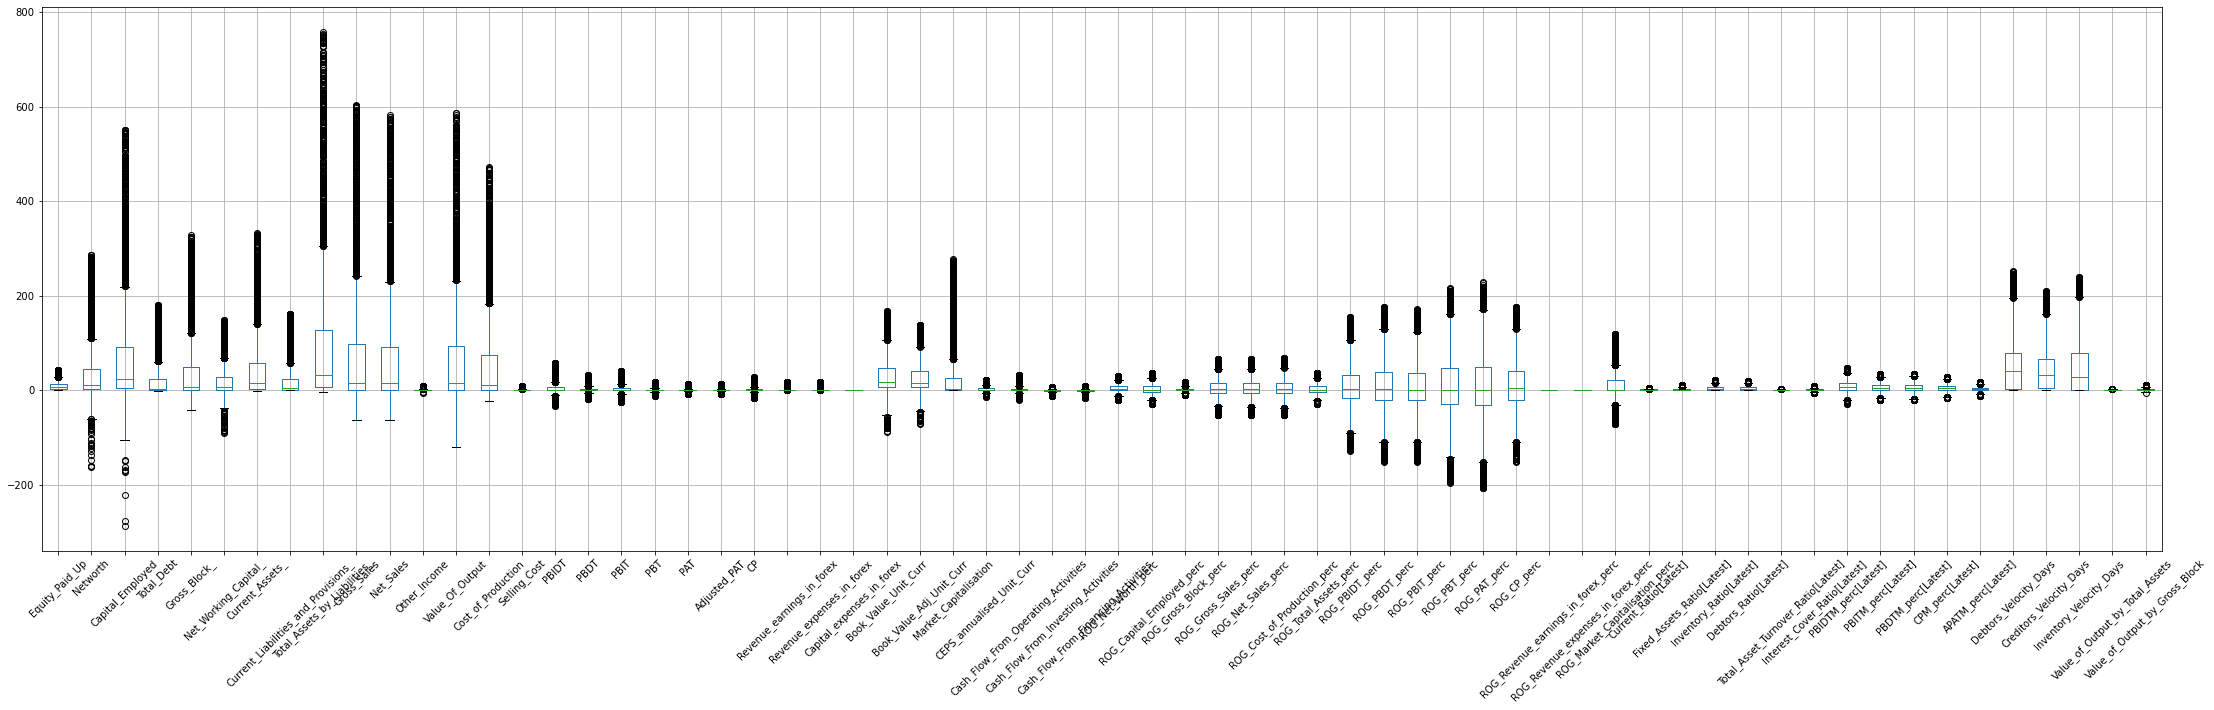

In [35]:
plt.figure(figsize=(38,10))
df_X.boxplot()
plt.xticks(rotation=45)

The outliers present in the data is large in number. Treating the outlier may affect the data. Since, the data has financial inputs and is captured from different companies of different sizes, the outliers has information which is important in nature and should be treated accordingly.  

### 1.2 MISSING VALUE TREATMENT

In [36]:
df_X.isnull().sum().sum()

41473

In [37]:
df_X.shape

(3586, 64)

In [38]:
## VISUAL INSPECTION OF THE MISSING DATA

In [39]:
df_sub1 = pd.concat([df_X, df_Y], axis =1 )

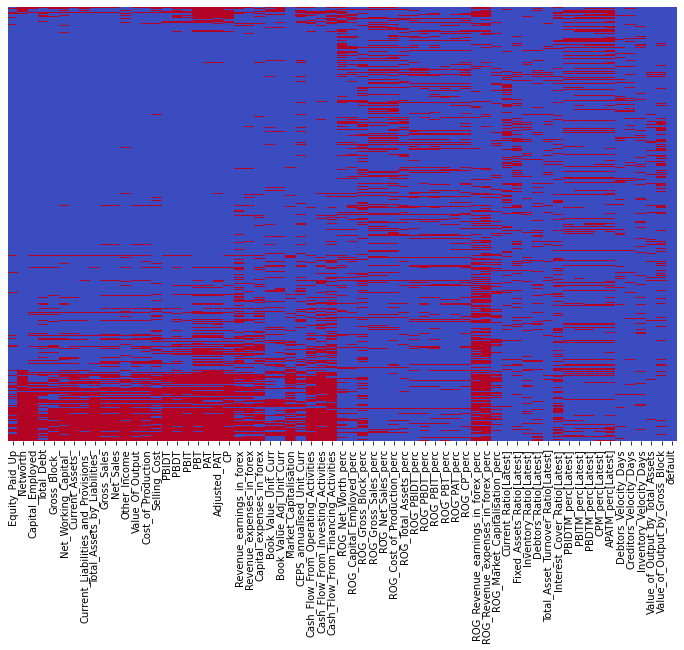

In [40]:
plt.figure(figsize = (12,8))
sns.heatmap(df_sub1.isnull(), cbar = False, cmap = 'coolwarm', yticklabels = False)
plt.show()

Inspecting total missing variables by row

In [41]:
df_sub1.isnull().sum(axis = 1)

0       19
1       34
2       43
3       36
4       35
        ..
3581    30
3582    36
3583    34
3584    30
3585    36
Length: 3586, dtype: int64

In [42]:
df_sub1.isnull().sum().sort_values(ascending = False)/df.index.size

ROG_Revenue_expenses_in_forex_perc    0.45
ROG_Revenue_earnings_in_forex_perc    0.37
Cash_Flow_From_Financing_Activities   0.28
PAT                                   0.27
Adjusted_PAT                          0.27
                                      ... 
Debtors_Ratio[Latest]                 0.10
Inventory_Velocity_Days               0.10
Total_Asset_Turnover_Ratio[Latest]    0.06
Value_of_Output_by_Total_Assets       0.04
default                               0.00
Length: 65, dtype: float64

In [43]:
### Dropping columns with more than 30% missing values

In [45]:
df_sub2 = df_sub1.drop(["ROG_Revenue_expenses_in_forex_perc","ROG_Revenue_earnings_in_forex_perc"],
                           axis = 1)

In [46]:
df_sub2.shape

(3586, 63)

SEGGREGATING THE PREDICTORS AND RESPONSE

In [47]:
predictors = df_sub2.drop('default', axis = 1)
response = df_sub2['default']

#### SACLING OF PREDICTOR VARIABLES

Scaling of predictor variables is essential for Regression models as it makes it easier for learning the problem in the dataset. Scaling the data is also essential as it makes sure that the values of the predictor variables, whether it may be too large or too small are standardized uniformly. 

In [48]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_predictors = pd.DataFrame(scaler.fit_transform(predictors), columns = predictors.columns)

In [49]:
df_sub3 = pd.concat([scaled_predictors, response], axis = 1)

In [50]:
## We can now move on to imputing the remaining values

In [51]:
from sklearn.impute import KNNImputer 
imputer = KNNImputer(n_neighbors=10)
df_imputed = pd.DataFrame(imputer.fit_transform(df_sub3), columns = df_sub3.columns)

In [52]:
df_imputed.isnull().sum()

Equity_Paid_Up                     0
Networth                           0
Capital_Employed                   0
Total_Debt                         0
Gross_Block_                       0
                                  ..
Creditors_Velocity_Days            0
Inventory_Velocity_Days            0
Value_of_Output_by_Total_Assets    0
Value_of_Output_by_Gross_Block     0
default                            0
Length: 63, dtype: int64

The data has been imputed using the KNN imputer. The data is first scaled and processed before imputing the missing values

In [53]:
df_copy=df_imputed.copy()

Correlations between variables in the dataset:

<AxesSubplot:>

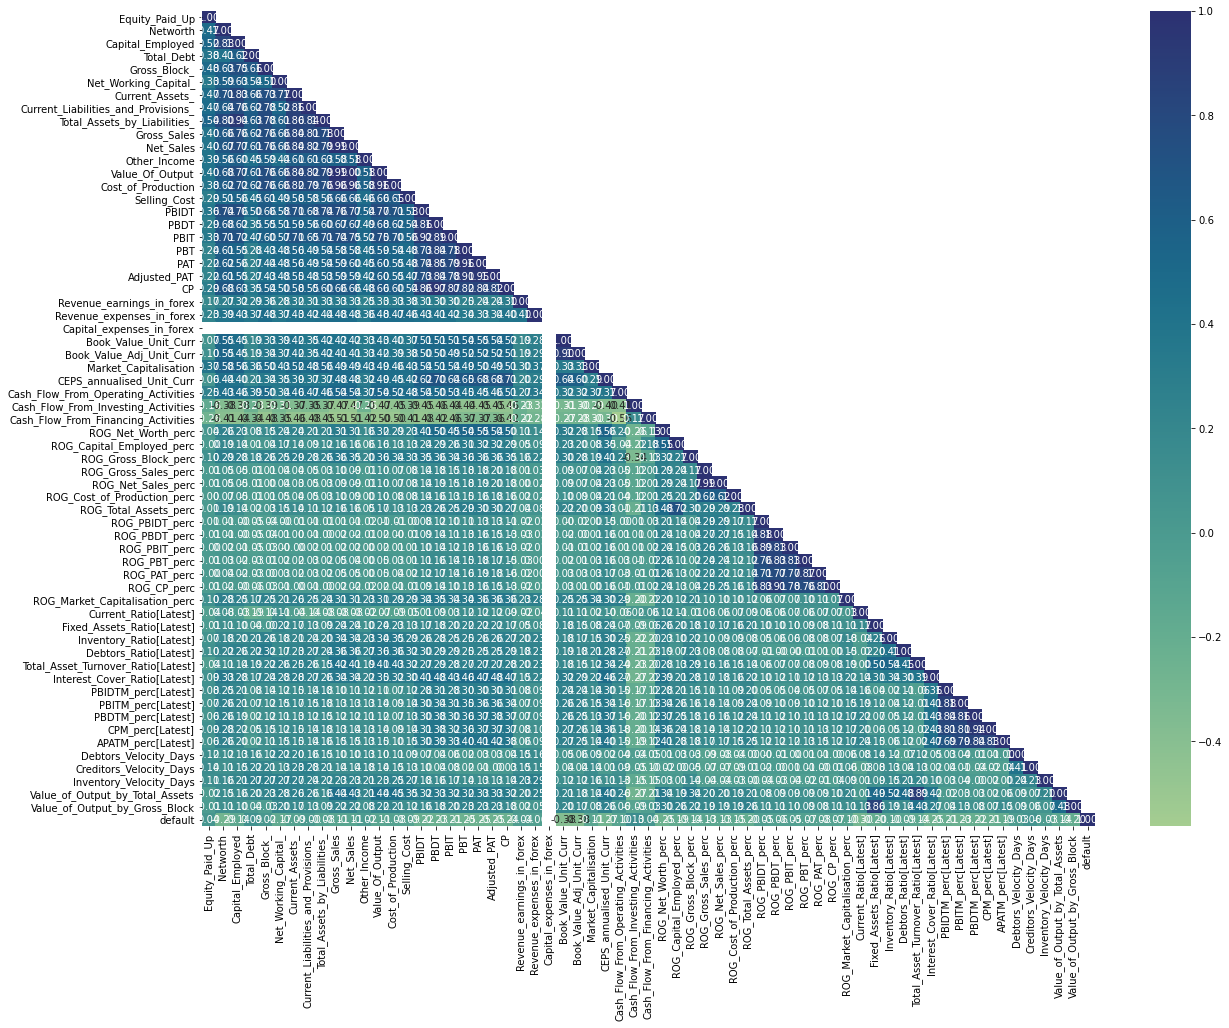

In [54]:
plt.figure(figsize=(20,15))
sns.heatmap(df_imputed.corr(), annot=True, fmt='.2f', cmap='crest', mask=np.triu(df_imputed.corr(),+1))

In [55]:
X = df_imputed.drop('default', axis = 1)
y = df_imputed['default']

### 1.6 SPLITTING THE MODEL INTO TRAIN & TEST DATA

In [56]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.33, random_state = 42, stratify= y)

In [57]:
print(X_train.shape)
print(X_test.shape)

(2402, 62)
(1184, 62)


In [58]:
print(y_train.shape)
print(y_test.shape)

(2402,)
(1184,)


In [59]:
df_train = pd.concat([X_train, y_train], axis = 1)
df_test = pd.concat([X_test, y_test], axis = 1)

Using VIF to check the important variables that will be used for model building

In [60]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [61]:
X = df_imputed.drop('default', axis = 1)
calc_vif(X).sort_values(by = 'VIF', ascending = False)

,variables,VIF
10,Net_Sales,248.18
12,Value_Of_Output,160.04
9,Gross_Sales,93.85
35,ROG_Gross_Sales_perc,90.51
36,ROG_Net_Sales_perc,90.36
...,...,...
22,Revenue_earnings_in_forex,1.38
45,ROG_Market_Capitalisation_perc,1.29
59,Inventory_Velocity_Days,1.29
46,Current_Ratio[Latest],1.27


In [62]:
X = X.drop('Net_Sales', axis = 1)
calc_vif(X).sort_values(by = 'VIF', ascending = False)

,variables,VIF
34,ROG_Gross_Sales_perc,90.29
35,ROG_Net_Sales_perc,90.13
11,Value_Of_Output,65.80
9,Gross_Sales,61.75
18,PAT,24.28
...,...,...
21,Revenue_earnings_in_forex,1.38
44,ROG_Market_Capitalisation_perc,1.29
58,Inventory_Velocity_Days,1.29
45,Current_Ratio[Latest],1.27


The above gives the most important variables for logistic regression model building using VIF. Since there are lots of variables present in the data VIF may not be the best possible way to use for model building. An alternative to model building in this case is RFE. 

In [63]:
X.columns

Index(['Equity_Paid_Up', 'Networth', 'Capital_Employed', 'Total_Debt',
       'Gross_Block_', 'Net_Working_Capital_', 'Current_Assets_',
       'Current_Liabilities_and_Provisions_', 'Total_Assets_by_Liabilities_',
       'Gross_Sales', 'Other_Income', 'Value_Of_Output', 'Cost_of_Production',
       'Selling_Cost', 'PBIDT', 'PBDT', 'PBIT', 'PBT', 'PAT', 'Adjusted_PAT',
       'CP', 'Revenue_earnings_in_forex', 'Revenue_expenses_in_forex',
       'Capital_expenses_in_forex', 'Book_Value_Unit_Curr',
       'Book_Value_Adj_Unit_Curr', 'Market_Capitalisation',
       'CEPS_annualised_Unit_Curr', 'Cash_Flow_From_Operating_Activities',
       'Cash_Flow_From_Investing_Activities',
       'Cash_Flow_From_Financing_Activities', 'ROG_Net_Worth_perc',
       'ROG_Capital_Employed_perc', 'ROG_Gross_Block_perc',
       'ROG_Gross_Sales_perc', 'ROG_Net_Sales_perc',
       'ROG_Cost_of_Production_perc', 'ROG_Total_Assets_perc',
       'ROG_PBIDT_perc', 'ROG_PBDT_perc', 'ROG_PBIT_perc', 'ROG_PBT_perc

### 1.6 BUILDING LOGISTIC REGRESSION MODEL 

In [64]:
import statsmodels.formula.api as SM

In [65]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

### MODEL 1

In [66]:

LogR = LogisticRegression()
selector = RFE(estimator = LogR, n_features_to_select=15, step=1)
selector = selector.fit(X_train, y_train)
selector.n_features_

15

In [67]:
selector.ranking_

array([32,  1,  1,  3,  7, 25,  1, 42,  1,  1, 27, 35,  1,  1, 24, 10, 28,
       11,  9,  1,  1, 29, 15, 17, 48,  1,  1, 36, 40, 39, 45, 37,  6, 12,
       16, 19, 20,  1, 46, 30, 14, 18, 43, 13, 47, 34,  1,  1,  8, 44, 41,
        1,  4, 23, 22, 21,  5, 26, 33, 31,  2, 38])

In [68]:
df = pd.DataFrame({'Feature': scaled_predictors.columns, 'Rank': selector.ranking_})
df[df['Rank'] == 1]

,Feature,Rank
1,Networth,1
2,Capital_Employed,1
6,Current_Assets_,1
8,Total_Assets_by_Liabilities_,1
9,Gross_Sales,1
12,Value_Of_Output,1
13,Cost_of_Production,1
19,PAT,1
20,Adjusted_PAT,1
25,Book_Value_Unit_Curr,1


In [69]:
model_1 = SM.logit(formula = 'default ~ Networth+ Capital_Employed+Current_Assets_+Total_Assets_by_Liabilities_+Gross_Sales+Value_Of_Output+Cost_of_Production+PAT+Adjusted_PAT+Book_Value_Unit_Curr+Book_Value_Adj_Unit_Curr+ROG_Cost_of_Production_perc+Current_Ratio[Latest]+Fixed_Assets_Ratio[Latest]+Interest_Cover_Ratio[Latest]', data=df_imputed).fit()

PatsyError: Error evaluating factor: NameError: name 'Interest_Cover_Ratio' is not defined
    default ~ Networth+ Capital_Employed+Current_Assets_+Total_Assets_by_Liabilities_+Gross_Sales+Value_Of_Output+Cost_of_Production+PAT+Adjusted_PAT+Book_Value_Unit_Curr+Book_Value_Adj_Unit_Curr+ROG_Cost_of_Production_perc+Current_Ratio[Latest]+Fixed_Assets_Ratio[Latest]+Interest_Cover_Ratio[Latest]
                                                                                                                                                                                                                                                                                 ^^^^^^^^^^^^^^^^^^^^^^^^^^^^

In [ ]:
model_1.summary()

In [ ]:
model_2 = SM.logit(formula = 'default ~ Networth+Capital_Employed+Curr_Liab_and_Prov+Total_Assets_to_Liab+Value_Of_Output+Cost_of_Prod+PAT+Adjusted_PAT+Book_Value_Unit_Curr+Book_Value_Adj_Unit_Curr+ROG_Cost_of_Prod_perc+Curr_Ratio_Latest+Fixed_Assets_Ratio_Latest+Interest_Cover_Ratio_Latest', data=df_imputed).fit()

In [ ]:
model_2.summary()

In [ ]:
model_3 = SM.logit(formula = 'default ~ Networth+Capital_Employed+Curr_Liab_and_Prov+Total_Assets_to_Liab+Cost_of_Prod+PAT+Adjusted_PAT+Book_Value_Unit_Curr+Book_Value_Adj_Unit_Curr+ROG_Cost_of_Prod_perc+Curr_Ratio_Latest+Fixed_Assets_Ratio_Latest+Interest_Cover_Ratio_Latest', data=df_imputed).fit()

In [ ]:
model_3.summary()

In [ ]:
model_4 = SM.logit(formula = 'default ~ Networth+Capital_Employed+Total_Assets_to_Liab+Cost_of_Prod+PAT+Adjusted_PAT+Book_Value_Unit_Curr+Book_Value_Adj_Unit_Curr+ROG_Cost_of_Prod_perc+Curr_Ratio_Latest+Fixed_Assets_Ratio_Latest+Interest_Cover_Ratio_Latest', data=df_imputed).fit()

In [ ]:
model_4.summary()

In [ ]:
model_5 = SM.logit(formula = 'default ~ Networth+Capital_Employed+Total_Assets_to_Liab+Cost_of_Prod+Adjusted_PAT+Book_Value_Unit_Curr+Book_Value_Adj_Unit_Curr+ROG_Cost_of_Prod_perc+Curr_Ratio_Latest+Fixed_Assets_Ratio_Latest+Interest_Cover_Ratio_Latest', data=df_imputed).fit()

In [ ]:
model_5.summary()

In [ ]:
model_6 = SM.logit(formula = 'default ~ Networth+Capital_Employed+Total_Assets_to_Liab+Cost_of_Prod+Book_Value_Unit_Curr+Book_Value_Adj_Unit_Curr+ROG_Cost_of_Prod_perc+Curr_Ratio_Latest+Fixed_Assets_Ratio_Latest+Interest_Cover_Ratio_Latest', data=df_imputed).fit()

In [ ]:
model_6.summary()

In [ ]:
model_7 = SM.logit(formula = 'default ~ Networth+Capital_Employed+Total_Assets_to_Liab+Cost_of_Prod+Book_Value_Adj_Unit_Curr+ROG_Cost_of_Prod_perc+Curr_Ratio_Latest+Fixed_Assets_Ratio_Latest+Interest_Cover_Ratio_Latest', data=df_imputed).fit()

In [ ]:
model_7.summary()

In [ ]:
model_8 = SM.logit(formula = 'default ~ Networth+Capital_Employed+Total_Assets_to_Liab+Cost_of_Prod+Book_Value_Adj_Unit_Curr+ROG_Cost_of_Prod_perc+Curr_Ratio_Latest+Interest_Cover_Ratio_Latest', data=df_imputed).fit()

In [ ]:
model_8.summary()

In [ ]:
y_prob_pred_train = model_8.predict(df_train)

In [ ]:
y_class_pred=[]
for i in range(0,len(y_prob_pred_train)):
    if np.array(y_prob_pred_train)[i]>0.5:
        a=1
    else:
        a=0
    y_class_pred.append(a)

In [ ]:
from sklearn import metrics

In [ ]:
sns.heatmap((metrics.confusion_matrix(df_train['default'],y_class_pred)),annot=True,fmt='.5g'
            ,cmap='Blues');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

In [ ]:
y_prob_pred_8 = model_8.predict()

In [ ]:
sns.boxplot(x=df_imputed['default'],y=y_prob_pred_8)
plt.xlabel('Default');

In [ ]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(df_train['default'],y_prob_pred_train)

In [ ]:
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]
optimal_threshold

Validating on the train set with revised threshold

In [ ]:
y_class_pred=[]
for i in range(0,len(y_prob_pred_train)):
    if np.array(y_prob_pred_train)[i]>0.17:
        a=1
    else:
        a=0
    y_class_pred.append(a)

In [ ]:
sns.heatmap((metrics.confusion_matrix(df_train['default'],y_class_pred)),annot=True,fmt='.5g'
            ,cmap='Blues');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

In [ ]:
print(metrics.classification_report(df_train['default'],y_class_pred,digits=3))

Validating on the test set

In [ ]:
y_prob_pred_test = model_8.predict(df_test)

In [ ]:
y_class_pred=[]
for i in range(0,len(y_prob_pred_test)):
    if np.array(y_prob_pred_test)[i]>0.17:
        a=1
    else:
        a=0
    y_class_pred.append(a)

In [ ]:
sns.heatmap((metrics.confusion_matrix(df_test['default'],y_class_pred)),annot=True,fmt='.5g'
            ,cmap='Blues');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

In [ ]:
print(metrics.classification_report(df_test['default'],y_class_pred,digits=3))